# **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Stevi Aprilianti Cahyani
- **Email:** steviaprilia7@gmail.com
- **ID Dicoding:** apriliaastevi

## **Menentukan Pertanyaan Bisnis**

- Pertanyaan 1: Kapan waktu (jam) dengan jumlah penyewaan sepeda terbanyak?
- Pertanyaan 2: Pada bulan apa penyewaan sepeda banyak dilakukan?
- Pertanyaan 3: Pada hari apa sepeda paling sedikit dan banyak yang disewa?
- Pertanyaan 4: Di cuaca seperti apa sepeda paling sedikit disewa?
- Pertanyaan 5: Mana yang lebih banyak antara penyewa registered atau casual?
- Pertanyaan 6 : Kapan orang lebih sering menyewa sepeda, apakah pada hari libur atau hari kerja?
- Pertanyaan 7: Bagaimana performa penyewaan sepeda dalam beberapa tahun terakhir?

## **Import Semua Packages/Library yang Digunakan**

In [1]:
# Memanggil semua library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

### **Gathering Data**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [3]:
day_df = pd.read_csv('day.csv')
print("Preview Day Dataset:")
day_df.head()

Preview Day Dataset:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv('hour.csv')
print("Preview Hour Dataset:")
hour_df.head()

Preview Hour Dataset:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# Mengecek jumlah baris dan kolom di day.csv
print("Shape of day_df (rows, columns):", day_df.shape)

# Mengecek jumlah baris dan kolom di hour.csv
hour_df = pd.read_csv('hour.csv')
print("Shape of hour_df (rows, columns):", hour_df.shape)

Shape of day_df (rows, columns): (731, 16)
Shape of hour_df (rows, columns): (17379, 17)


**Insight:**

Jumlah file dataset yang diupload sebanyak 2 yaitu day_df dimana memiliki 731 baris dan 16 kolom sementara hour_df memiliki 17379 baris dan 17 kolom.

### **Assessing Data**

***Menilai day_df***

In [6]:
# cek data info
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


Berdasarkan output, terdapat tipe data yang tidak sesuai pada kolom dteday dan harus dikonversi menjadi datetime.

In [7]:
# cek missing value
print("Missing data in day_df:")
print(day_df.isnull().sum())

Missing data in day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Berdasarkan hasil output, tidak terdapat missing value

In [8]:
# Mengecek duplikasi data di day.csv
print("Jumlah data duplikat di day_df:", day_df.duplicated().sum())

Jumlah data duplikat di day_df: 0


In [9]:
# Statistik deskriptif untuk day.csv
print("Statistik deskriptif day_df:")
print(day_df.describe())

Statistik deskriptif day_df:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486  

**Insight dari Uji Assessing Data - Dataset day.csv**

1. Kualitas Data

- Jumlah data: Dataset memiliki 731 baris dan 16 kolom.

- Kelengkapan data: Tidak ditemukan missing values di kolom mana pun. Artinya, data lengkap dan tidak perlu penanganan nilai kosong.

- Tipe data: Sebagian besar kolom memiliki tipe data yang sesuai, seperti int64 untuk angka diskrit (seperti tahun, bulan, hari), dan float64 untuk nilai kontinu (seperti suhu dan kelembapan).


2. Distribusi Variabel Penting

- cnt (total penyewaan sepeda):

  Rata-rata: 4504 sepeda/hari

  Minimum: 22 sepeda (hari dengan penyewaan terendah)

  Maksimum: 8714 sepeda (hari dengan penyewaan tertinggi)

*Insight: Ada fluktuasi besar dalam jumlah penyewaan sepeda harian, mengindikasikan potensi pengaruh faktor eksternal seperti cuaca, musim, dan hari libur.*

3. casual (penyewa kasual) vs registered (penyewa terdaftar):
- Rata-rata penyewa kasual: 848 sepeda/hari

- Rata-rata penyewa terdaftar: 3566 sepeda/hari

*Insight: Mayoritas pengguna adalah penyewa terdaftar. Bisa jadi karena mereka menggunakan sepeda untuk aktivitas rutin (seperti bekerja atau sekolah), sedangkan penyewa kasual mungkin hanya menggunakan sepedauntuk rekreasional.*

3. Variabel Waktu

- Tahun (yr): Memiliki dua nilai, yaitu 0 dan 1 — merepresentasikan data dari 2011 (0) dan 2012 (1).

- Bulan (mnth): Nilainya berkisar dari 1-12 — berarti dataset mencakup seluruh bulan dalam satu tahun.

- Hari (weekday): Rentang nilai dari 0-6 — menunjukan data mewakili Senin hingga Minggu.

Insight: Dataset sudah mencakup dimensi waktu yang lengkap, memungkinkan kita menganalisis tren penyewaan sepeda berdasarkan hari, bulan, dan tahun.

4. Faktor Cuaca

- Suhu (temp): Rata-rata 0.49

- Kelembapan (hum): Rata-rata 0.62

- Kecepatan angin (windspeed): Rata-rata 0.19

Insight: Faktor cuaca sudah dinormalisasi (0-1), sehingga analisis lebih lanjut memerlukan denormalisasi agar interpretasi lebih realistis. *italicized text*

5. Potensi Masalah Data

Normalisasi: Kolom cuaca (temp, atemp, hum, windspeed) menggunakan skala 0-1, jadi kita perlu mengkonversi ulang jika ingin mendapatkan nilai suhu dan kelembapan yang sebenarnya.




***Menilai hour_df***

In [10]:
# cek data info
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Berdasarkan output, Dataset tidak memiliki missing value.Namun Kolom dteday perlu dikonversi ke datetime untuk memudahkan analisis waktu.

In [11]:
# cek missing value
print("Missing data in hour_df:")
print(hour_df.isnull().sum())

Missing data in hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [12]:
# Mengecek duplikasi data di hour.csv
print("Jumlah data duplikat di hour_df:", hour_df.duplicated().sum())

Jumlah data duplikat di hour_df: 0


In [13]:
# Statistik deskriptif untuk hour.csv
print("Statistik deskriptif hour_df:")
print(hour_df.describe())

Statistik deskriptif hour_df:
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      

Jumlah penyewa terdaftar jauh lebih banyak dibandingkan penyewa kasual. Penyewaan cenderung terjadi di hari kerja dan siang hari (jam 11-12). Cuaca (suhu, kelembaban, angin) memiliki rentang nilai yang sudah dinormalisasi. Ada indikasi bahwa penyewaan lebih aktif di bulan pertengahan tahun (Juni).

**Insight dari Uji Assessing Data - Dataset Hour**

1. Kondisi Data:

   - Dataset terdiri dari 17 kolom dan 17.379 baris.

  - Tidak ditemukan missing values
 - semua kolom memiliki jumlah entri yang sama.

2. Kesesuaian Tipe Data:

  - Pada Kolom dteday terdapat adanya tidak kesesuaian karena bertipe object — disarankan dikonversi ke tipe datetime untuk mempermudah analisis waktu.

  - Kolom lainnya bertipe int64 dan float64 sudah sesuai dengan kegunaannya.

3. Distribusi Data:

   - Jam (hr): Tersebar dari 0 hingga 23 (format 24 jam).

  - Bulan (mnth): Rentang 1-12.

  - Tahun (yr): Memiliki nilai 0 dan 1 (diasumsikan 0 = 2011, 1 = 2012).

  Karakteristik Hari dan Cuaca:

    - holiday: Bernilai 0 atau 1. Mayoritas data berasal dari hari biasa (rerata 0.028).

    - workingday: Mayoritas data berasal dari hari kerja (rerata 0.68).

  - weathersit: Bernilai 1 hingga 4 (kondisi cuaca), distribusi rata-rata 1.42 — mayoritas cuaca cerah atau berawan ringan.

  Distribusi Penyewaan Sepeda:

  - casual (penyewa tidak terdaftar): Rata-rata 35 penyewa per jam.

  - registered (penyewa terdaftar): Rata-rata 153 penyewa per jam.

  - cnt (total penyewa): Rata-rata 189 penyewa per jam, dengan nilai maksimal 977 penyewa.


Temuan Penting:

Dataset tidak memiliki data null, Mayoritas penyewaan terjadi pada hari kerja,

Penyewa terdaftar secara konsisten lebih banyak dibandingkan kasua, Ada indikasi aktivitas penyewaan paling sibuk terjadi di siang hari (sekitar jam 11-12).

Tindak Lanjut:

- Konversi dteday ke format datetime.

- Lakukan analisis lebih dalam untuk menguji pola penyewaan berdasarkan jam, hari, dan cuaca.

- Bandingkan penyewa casual vs registered untuk memahami pola mereka.

### **Cleaning Data**

**Merename beberapa bagian kolom**

Dengan merename nama judul kolom, maka dapat membantu agar data lebih mudah untuk dipahami dan menghindari akan adanya penulisan syntax yang tidak disengaja.

In [14]:
# Rename kolom day_df
day_df.rename(columns={
    'instant': 'record_index',
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'holiday': 'holiday',
    'weekday': 'one_of_week',
    'workingday': 'working_day',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feels_like_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual_rentals',
    'registered': 'registered_rentals',
    'cnt': 'total_rentals'
}, inplace=True)

# Cek perubahan
print("Kolom day_df:", day_df.columns)

Kolom day_df: Index(['record_index', 'date', 'season', 'year', 'month', 'holiday',
       'one_of_week', 'working_day', 'weather_condition', 'temperature',
       'feels_like_temperature', 'humidity', 'wind_speed', 'casual_rentals',
       'registered_rentals', 'total_rentals'],
      dtype='object')


In [15]:
# Rename kolom hour_df
hour_df.rename(columns={
    'instant': 'record_index',
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'holiday',
    'weekday': 'one_of_week',
    'workingday': 'working_day',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feels_like_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual_rentals',
    'registered': 'registered_rentals',
    'cnt': 'total_rentals'
}, inplace=True)

# Cek perubahan nama kolom
print("Kolom Hour Dataset:", hour_df.columns)

Kolom Hour Dataset: Index(['record_index', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'one_of_week', 'working_day', 'weather_condition', 'temperature',
       'feels_like_temperature', 'humidity', 'wind_speed', 'casual_rentals',
       'registered_rentals', 'total_rentals'],
      dtype='object')


**Mengubah tipe data**

Melakukan perubahan tipe data yang tidak sesuai agar data dapat lebih mudah untuk terbaca pada saat di rename atau diubah menjadi bentuk lain.

In [16]:
day_df['date'] = pd.to_datetime(day_df['date'])
hour_df['date'] = pd.to_datetime(hour_df['date'])

print(day_df['date'].dtype)
print(hour_df['date'].dtype)

datetime64[ns]
datetime64[ns]


In [17]:
columns = ['season', 'month', 'one_of_week', 'weather_condition']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

print(day_df['season'].dtype)
print(hour_df['month'].dtype)
print(hour_df['one_of_week'].dtype)
print(day_df['weather_condition'].dtype)


category
category
category
category


**Mengubah data numerik menjadi kategori di beberapa isi kolom**

Dengan mengubah data numerik menjadi kategori maka data akan lebih mudah untuk dipahami.

In [18]:
# mengubah data numerik di kolom season
day_df['season'] = day_df['season'].cat.rename_categories({
    1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"
})

hour_df['season'] = hour_df['season'].cat.rename_categories({
    1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"
})

print(day_df['season'].unique())
print(hour_df['season'].unique())

['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']
['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']


In [19]:
# mengubah data numerik di kolom year
day_df['year'] = day_df['year'].replace({0: 2011, 1: 2012})
hour_df['year'] = hour_df['year'].replace({0: 2011, 1: 2012})

print(day_df['year'].unique())
print(hour_df['year'].unique())

[2011 2012]
[2011 2012]


In [20]:
# mengubah data numerik di kolom month
day_df['month'] = day_df['month'].cat.rename_categories({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

hour_df['month'] = hour_df['month'].cat.rename_categories({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

print(day_df['month'].unique())
print(hour_df['month'].unique())

['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']
['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']


In [21]:
# mengubah data dari numerik ke nama hari
day_df['one_of_week'] = day_df['one_of_week'].cat.rename_categories({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed',
    4: 'Thu', 5: 'Fri', 6: 'Sat'
})

hour_df['one_of_week'] = hour_df['one_of_week'].cat.rename_categories({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed',
    4: 'Thu', 5: 'Fri', 6: 'Sat'
})

# Menampilkan hasil unik dalam urutan yang benar
print(day_df['one_of_week'].sort_values().unique())
print(hour_df['one_of_week'].sort_values().unique())

['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
Categories (7, object): ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
Categories (7, object): ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']


In [22]:
# mengubah data numerik menjadi kategori pada kondisi cuaca
day_df['weather_condition'] = day_df['weather_condition'].cat.rename_categories({
    1: "clear",
    2: "misty",
    3: "light rain/light snow"
})

hour_df['weather_condition'] = hour_df['weather_condition'].cat.rename_categories({
    1: "clear",
    2: "misty",
    3: "light rain/light snow",
    4: "bad weather"
})
print(day_df['weather_condition'].unique())
print(hour_df['weather_condition'].unique())

['misty', 'clear', 'light rain/light snow']
Categories (3, object): ['clear', 'misty', 'light rain/light snow']
['clear', 'misty', 'light rain/light snow', 'bad weather']
Categories (4, object): ['clear', 'misty', 'light rain/light snow', 'bad weather']


**Insight - Tahap Data Cleaning**
- Standarisasi Kategori (Mapping Data Numerik) agar data lebih mudah dipahami dan membantu dalam visualisasi nanti.
- Terdapat potensi NaN saat mapping karena jumlah kategori berbeda di day_df dan hour_df.Dengan menggunakan mapping yang sama, kita memastikan tidak ada data yang hilang atau tidak terkonversi dengan baik.
- Kolom tanggal (dteday) dicek apakah sudah dalam format datetime.
Jika belum, dilakukan konversi agar bisa digunakan untuk analisis berbasis waktu, seperti tren penyewaan harian atau bulanan.
- Meskipun urutan kategori seperti weekday, weather_condition mungkin berubah saat mapping, itu tidak berpengaruh ke analisis karena bisa diatur kembali saat visualisasi.


## **Exploratory Data Analysis (EDA)**

##  **Explore Untuk Memahami Struktur Data**

In [23]:
# Cek jumlah baris dan kolom
print(f"Dataset memiliki {day_df.shape[0]} baris dan {day_df.shape[1]} kolom.")
print(f"Dataset memiliki {hour_df.shape[0]} baris dan {hour_df.shape[1]} kolom.")

Dataset memiliki 731 baris dan 16 kolom.
Dataset memiliki 17379 baris dan 17 kolom.


In [24]:
# Melihat tampilan data
display(day_df.head())
display(hour_df.head())

,record_index,date,season,year,month,holiday,one_of_week,working_day,weather_condition,temperature,feels_like_temperature,humidity,wind_speed,casual_rentals,registered_rentals,total_rentals
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,0,misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,1,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,1,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,1,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,record_index,date,season,year,month,hour,holiday,one_of_week,working_day,weather_condition,temperature,feels_like_temperature,humidity,wind_speed,casual_rentals,registered_rentals,total_rentals
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,0,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,0,clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,0,clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,0,clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,0,clear,0.24,0.2879,0.75,0.0,0,1,1


In [25]:
# Cek tipe data setiap kolom
print(day_df.info())
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   record_index            731 non-null    int64         
 1   date                    731 non-null    datetime64[ns]
 2   season                  731 non-null    category      
 3   year                    731 non-null    int64         
 4   month                   731 non-null    category      
 5   holiday                 731 non-null    int64         
 6   one_of_week             731 non-null    category      
 7   working_day             731 non-null    int64         
 8   weather_condition       731 non-null    category      
 9   temperature             731 non-null    float64       
 10  feels_like_temperature  731 non-null    float64       
 11  humidity                731 non-null    float64       
 12  wind_speed              731 non-null    float64   

In [26]:
# Cek jumlah missing values
print("\nMissing Values per Kolom:\n", day_df.isnull().sum())
print("\nMissing Values per Kolom:\n", hour_df.isnull().sum())


Missing Values per Kolom:
 record_index              0
date                      0
season                    0
year                      0
month                     0
holiday                   0
one_of_week               0
working_day               0
weather_condition         0
temperature               0
feels_like_temperature    0
humidity                  0
wind_speed                0
casual_rentals            0
registered_rentals        0
total_rentals             0
dtype: int64

Missing Values per Kolom:
 record_index              0
date                      0
season                    0
year                      0
month                     0
hour                      0
holiday                   0
one_of_week               0
working_day               0
weather_condition         0
temperature               0
feels_like_temperature    0
humidity                  0
wind_speed                0
casual_rentals            0
registered_rentals        0
total_rentals             0
dtype: 

In [27]:
# Cek duplikasi
print("\nJumlah Data Duplikat:", day_df.duplicated().sum())
print("\nJumlah Data Duplikat:", hour_df.duplicated().sum())


Jumlah Data Duplikat: 0

Jumlah Data Duplikat: 0


 **Total & Rata-rata Penyewaan Sepeda per Hari/Jam**

In [28]:
import pandas as pd

total_rentals_per_day = day_df['total_rentals'].sum()
total_rentals_per_hour = hour_df['total_rentals'].sum()

avg_rentals_per_day = day_df['total_rentals'].mean()
avg_rentals_per_hour = hour_df['total_rentals'].mean()

rental_summary = pd.DataFrame({
    "Metode Perhitungan": ["Total", "Rata-rata"],
    "Penyewaan per Hari": [f"{total_rentals_per_day:,}", f"{avg_rentals_per_day:.2f}"],
    "Penyewaan per Jam": [f"{total_rentals_per_hour:,}", f"{avg_rentals_per_hour:.2f}"]
})

print(rental_summary)

  Metode Perhitungan Penyewaan per Hari Penyewaan per Jam
0              Total          3,292,679         3,292,679
1          Rata-rata            4504.35            189.46


**Distribusi Jumlah penyewaan berdasarkan Jam dalam Sehari**

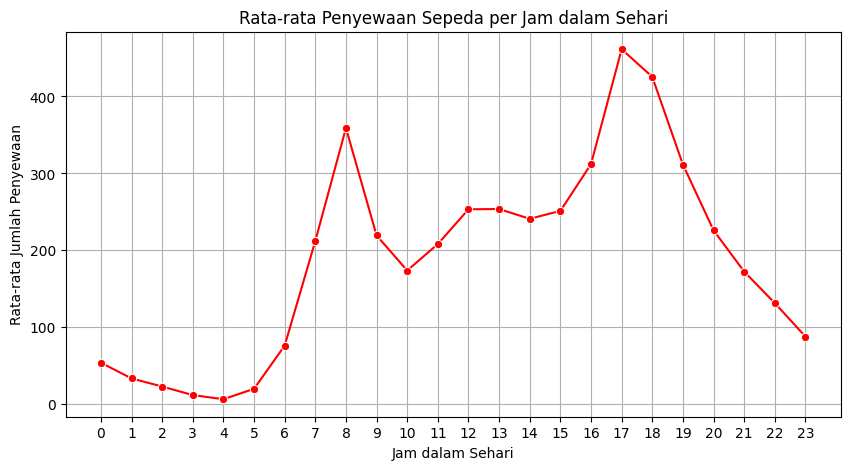

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_rentals_by_hour = hour_df.groupby('hour')['total_rentals'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_rentals_by_hour.index, y=avg_rentals_by_hour.values, marker="o", color="red")
plt.xticks(range(0, 24))
plt.title("Rata-rata Penyewaan Sepeda per Jam dalam Sehari")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.grid(True)
plt.show()

**Tren Penyewaan Berdasarkan Hari dalam Seminggu**

In [30]:
avg_rentals_by_weekday = (
    day_df.groupby("one_of_week", observed=True)["total_rentals"]
    .mean()
    .reset_index()
)

print(avg_rentals_by_weekday)

  one_of_week  total_rentals
0         Sun    4228.828571
1         Mon    4338.123810
2         Tue    4510.663462
3         Wed    4548.538462
4         Thu    4667.259615
5         Fri    4690.288462
6         Sat    4550.542857


**Perbandingan Penyewaan di  Hari Kerja vs Akhir Pekan**

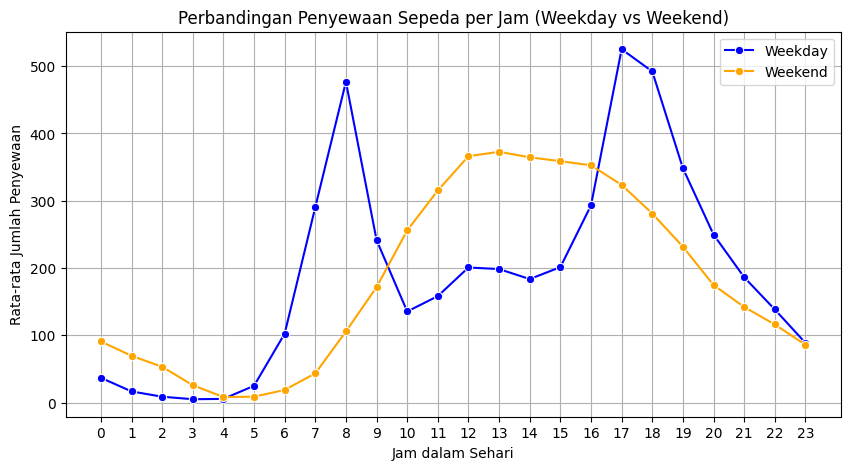

In [31]:
weekday_data = hour_df[hour_df['working_day'] == 1].groupby('hour')['total_rentals'].mean()
weekend_data = hour_df[hour_df['working_day'] == 0].groupby('hour')['total_rentals'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=weekday_data.index, y=weekday_data.values, marker="o", label="Weekday", color="blue")
sns.lineplot(x=weekend_data.index, y=weekend_data.values, marker="o", label="Weekend", color="orange")

plt.xticks(range(0, 24))
plt.title("Perbandingan Penyewaan Sepeda per Jam (Weekday vs Weekend)")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.legend()
plt.grid(True)
plt.show()

**Jumlah Penyewa Berdasarkan Kondisi Cuaca**


Tabel Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca

    weather_condition  total_rentals
          bad weather      74.333333
light rain/light snow     111.579281
                misty     175.165493
                clear     204.869272


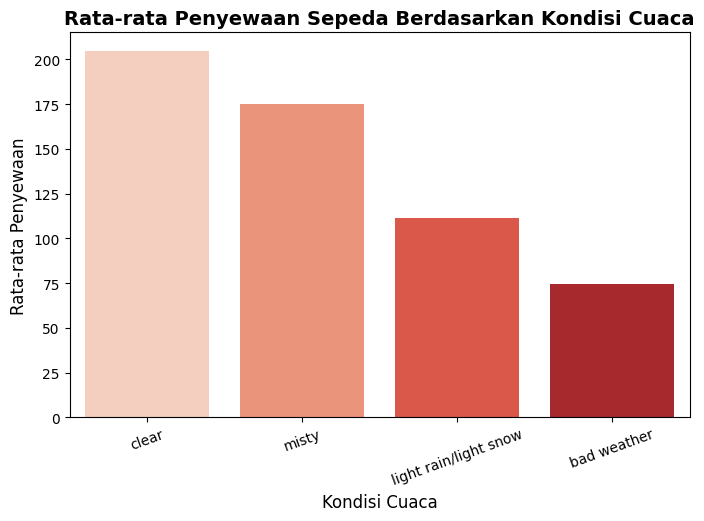

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_rentals_by_weather = (
    hour_df.groupby("weather_condition", observed=True)["total_rentals"]
    .mean()
    .reset_index()
)

avg_rentals_by_weather = avg_rentals_by_weather.sort_values(by="total_rentals", ascending=True)

# Tampilkan tabel
print("\nTabel Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca\n")
print(avg_rentals_by_weather.to_string(index=False))

# Buat bar plot dengan warna gradasi merah
plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_rentals_by_weather,
    x="weather_condition",
    y="total_rentals",
    hue="weather_condition",
    palette="Reds",
    legend=False,
)

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca", fontsize=14, fontweight="bold")
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)

plt.xticks(rotation=20)

plt.show()

**Korelasi Antara Suhu, Kelembaban, Kecepatan Angin dan Jumlah Penyewaan**


Korelasi antara fitur dan jumlah penyewaan:

               temperature  humidity  wind_speed  total_rentals
temperature       1.000000  0.126963   -0.157944       0.627494
humidity          0.126963  1.000000   -0.248489      -0.100659
wind_speed       -0.157944 -0.248489    1.000000      -0.234545
total_rentals     0.627494 -0.100659   -0.234545       1.000000


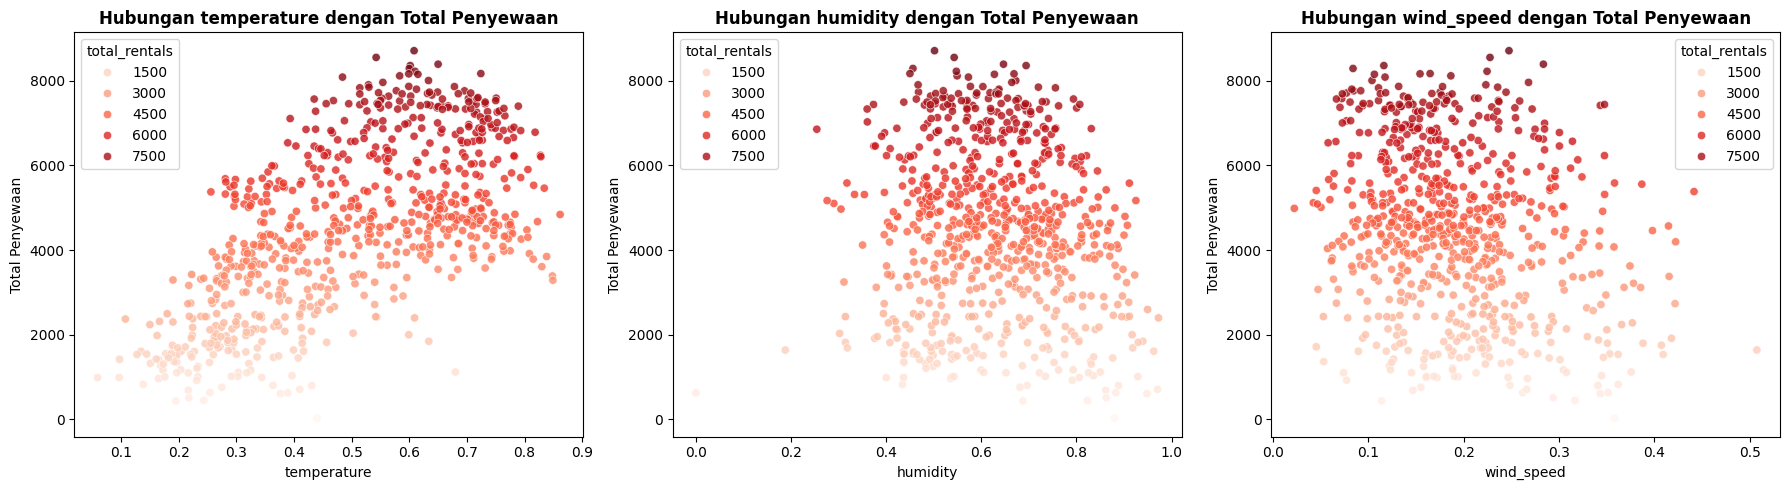

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_rentals_by_weekday = (
    day_df.groupby("one_of_week", observed=False)["total_rentals"]
    .mean()
    .reset_index()
)

order = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]

avg_rentals_by_weekday["one_of_week"] = pd.Categorical(
    avg_rentals_by_weekday["one_of_week"], categories=order, ordered=True
)

correlation_matrix = day_df[["temperature", "humidity", "wind_speed", "total_rentals"]].corr()
print("\nKorelasi antara fitur dan jumlah penyewaan:\n")
print(correlation_matrix)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
features = ["temperature", "humidity", "wind_speed"]

for i, feature in enumerate(features):
    scatter = sns.scatterplot(
        ax=axes[i],
        data=day_df,
        x=feature,
        y="total_rentals",
        hue="total_rentals",
        palette="Reds",
        alpha=0.8,
    )

    axes[i].set_title(f"Hubungan {feature} dengan Total Penyewaan", fontsize=12, fontweight="bold")
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel("Total Penyewaan", fontsize=10)

plt.tight_layout()
plt.show()

**Jumlah Penyewaan dalam Seminggu**

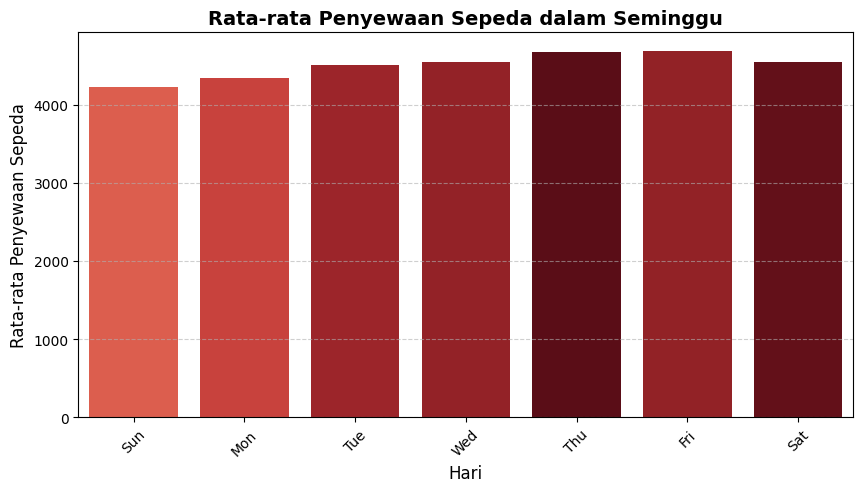

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

avg_rentals_by_weekday = (
    day_df.groupby("one_of_week", observed=False)["total_rentals"]
    .mean()
    .reset_index()
)

order = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]

avg_rentals_by_weekday["one_of_week"] = pd.Categorical(
    avg_rentals_by_weekday["one_of_week"], categories=order, ordered=True
)
avg_rentals_by_weekday = avg_rentals_by_weekday.sort_values("one_of_week")

min_value = avg_rentals_by_weekday["total_rentals"].min()
max_value = avg_rentals_by_weekday["total_rentals"].max()

cmap = sns.color_palette("Reds", as_cmap=True)
norm = mcolors.Normalize(vmin=min_value * 0.85, vmax=max_value)  # Agar warna terang tetap terlihat
colors = [cmap(norm(value)) for value in avg_rentals_by_weekday["total_rentals"]]

plt.figure(figsize=(10, 5))

sns.barplot(
    data=avg_rentals_by_weekday,
    x="one_of_week",
    y="total_rentals",
    order=order,
    hue="total_rentals",
    palette=colors,
    legend=False,
)

plt.title("Rata-rata Penyewaan Sepeda dalam Seminggu", fontsize=14, fontweight="bold")
plt.xlabel("Hari", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.rcParams["font.family"] = "Arial Unicode MS"
plt.show()

**Insight:**
1. Pola Penyewaan Berdasarkan Hari dalam Seminggu :

    Jumlah penyewaan cenderung lebih tinggi pada hari kerja (Selasa - Jumat) dibandingkan akhir pekan. Hal ini menunjukkan bahwa mayoritas pengguna adalah pekerja atau mahasiswa yang menggunakan sepeda sebagai transportasi utama.
Aksi: Bisa meningkatkan promosi atau diskon di akhir pekan untuk menarik lebih banyak pengguna rekreasi.

2. Korelasi Antara Faktor Cuaca dan Jumlah Penyewaan Suhu:
    
    Terdapat korelasi positif kuat antara suhu dan jumlah penyewaan (r = 0.63).
    Penyewaan cenderung lebih tinggi saat suhu lebih hangat (tidak terlalu dingin atau panas ekstrem).
Aksi: Bisa memprediksi permintaan berdasarkan musim dan mengalokasikan sepeda lebih banyak saat cuaca ideal.
   -  Kelembaban:

      Korelasi dengan penyewaan negatif lemah (r = -0.10), artinya dampaknya kecil.Meskipun begitu, kelembaban tinggi mungkin sedikit mengurangi kenyamanan pengguna.
  - Kecepatan Angin:
    
    Korelasi negatif cukup terlihat (r = -0.23), artinya semakin kencang angin, semakin sedikit penyewaan.

3. Pola Penyewaan Berdasarkan Kondisi Cuaca

    Penyewaan tertinggi terjadi saat cuaca cerah atau sedikit berawan.
    Saat hujan atau kondisi buruk, jumlah penyewaan menurun signifikan.


Kesimpulan Umum & Strategi Bisnis
-  Fokus pada hari kerja untuk penyewa dengan peningkatan stok sepeda.
- Optimalkan layanan saat suhu sedang ideal, seperti akhir musim hujan atau awal musim panas.
- Memberikan promosi atau diskon saat akhir pekan untuk meningkatkan jumlah penyewaan rekreasi.
- Antisipasi cuaca buruk dengan strategi mitigasi, misalnya penyewaan sepeda dengan mantel atau alat keselamatan lainnya.



## **Visualization & Explanatory Analysis**

### **Pertanyaan 1: Kapan waktu (jam) dengan jumlah penyewaan sepeda terbanyak?**

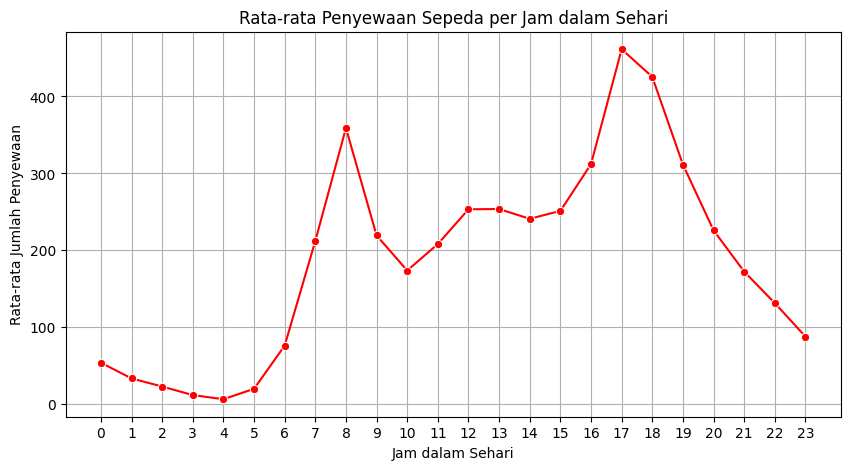

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_rentals_by_hour = hour_df.groupby('hour')['total_rentals'].mean()

plt.rcParams['font.family'] = 'DejaVu Sans'

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_rentals_by_hour.index, y=avg_rentals_by_hour.values, marker="o", color="red")
plt.xticks(range(0, 24))
plt.title("Rata-rata Penyewaan Sepeda per Jam dalam Sehari")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.grid(True)
plt.show()

Dari visualisasi di atas, dapat disimpulkan beberapa hal penting mengenai pola penyewaan sepeda berdasarkan jam :

- Jam Sibuk Pagi (07:00 - 09:00)

  Terjadi lonjakan signifikan pada pukul 07:00 - 08:00, dengan puncak penyewaan sekitar pukul 08:00.Hal ini kemungkinan besar disebabkan oleh penggunaan sepeda sebagai moda transportasi untuk pergi ke kantor atau sekolah.

- Jam Sibuk Sore (17:00 - 18:00)

  Puncak penyewaan tertinggi terjadi pada pukul 17:00 - 18:00. Tren ini menunjukkan bahwa banyak orang menggunakan sepeda sebagai transportasi pulang kerja atau aktivitas sore.

- Jam Sepi Penyewaan (00:00 - 05:00)

  Penyewaan sepeda sangat rendah pada dini hari, terutama antara pukul 00:00 - 05:00. Hal ini wajar karena pada jam tersebut aktivitas masyarakat relatif sedikit.

- Pola Penyewaan Sepeda Sehari-hari
  Ada dua puncak utama dalam sehari: pagi hari sekitar pukul 08:00 dan sore hari sekitar pukul 17:00. Hal ini dapat menunjukkan bahwa mayoritas pengguna sepeda menggunakannya untuk keperluan komuter (perjalanan rumah-ke-kantor atau rumah-ke-sekolah).


**Insight Bisnis:**

**- Strategi Penambahan Unit Sepeda**  

  Mengingat lonjakan yang signifikan pada jam 08:00 dan 17:00, pihak jasa sewa dapat meningkatkan jumlah sepeda yang tersedia pada jam-jam sibuk untuk menghindari kekurangan unit.

**- Optimasi Harga Sewa**

Tarif dinamis bisa diterapkan, dimana harga sewa lebih tinggi pada jam sibuk dan lebih rendah pada jam sepi untuk mendorong pemakaian di luar jam sibuk.

**- Penempatan Lokasi Sewa Sepeda**

Lokasi sewa sepeda di dekat kawasan perkantoran dan sekolah sebaiknya memiliki lebih banyak unit sepeda yang tersedia utamanya pada pagi dan sore hari.



### **Pertanyaan 2: Pada bulan apa penyewaan sepeda banyak dilakukan?**

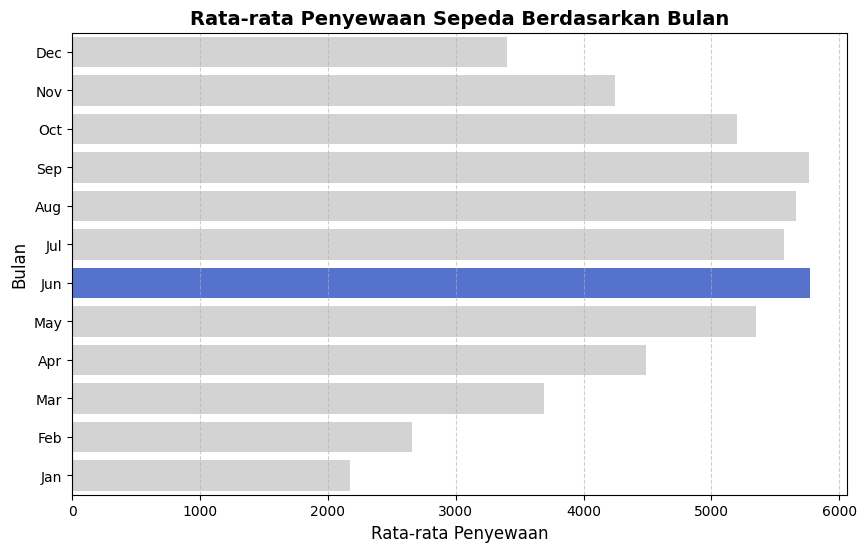

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_rentals_by_month = day_df.groupby('month', observed=True)['total_rentals'].mean().reset_index()

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

max_month = avg_rentals_by_month.loc[avg_rentals_by_month['total_rentals'].idxmax(), 'month']

colors = ['royalblue' if month == max_month else 'lightgray' for month in avg_rentals_by_month["month"]]

plt.figure(figsize=(10, 6))

sns.barplot(
    y=avg_rentals_by_month["month"],
    x=avg_rentals_by_month["total_rentals"],
    hue=avg_rentals_by_month["month"],
    palette=colors,
    orient="h",
    legend=False
)

plt.yticks(ticks=range(12), labels=month_labels)

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Bulan", fontsize=14, fontweight="bold")
plt.ylabel("Bulan", fontsize=12)
plt.xlabel("Rata-rata Penyewaan", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.gca().invert_yaxis()

plt.show()

Dari visualisasi di atas, dapat ditarik beberapa insight penting terkait tren penyewaan sepeda berdasarkan bulan:

- Penyewaan sepeda paling tinggi terjadi pada bulan Mei hingga September.

  Bulan dengan penyewaan tertinggi adalah Juni lalu disusul dengan Juli, Agustus, dan September, yang memiliki rata-rata penyewaan tertinggi dibanding bulan lainnya. Namun Penyewaan menurun drastis setelah di bulan September.

- Mulai Oktober hingga Desember jumlah penyewaan mengalami penurunan yang cukup signifikan.

- Januari dan Februari adalah bulan dengan rata-rata penyewaan sepeda terendah sepanjang tahun dan mulai mengalami Kenaikan signifikan mulai Maret hingga Mei.


**Insight Bisnis**

- Strategi Musiman
  
  Bisnis penyewaan sepeda dapat meningkatkan promosi dan stok unit sepeda di bulan Mei - September, karena permintaan sedang tinggi.

- Perencanaan Pemeliharaan

  Di bulan dengan penyewaan rendah (Januari - Februari) bisa dimanfaatkan untuk pemeliharaan sepeda, sehingga siap digunakan saat permintaan meningkat.

## **Pertanyaan 3: Pada hari apa sepeda paling sedikit dan banyak yang disewa?**

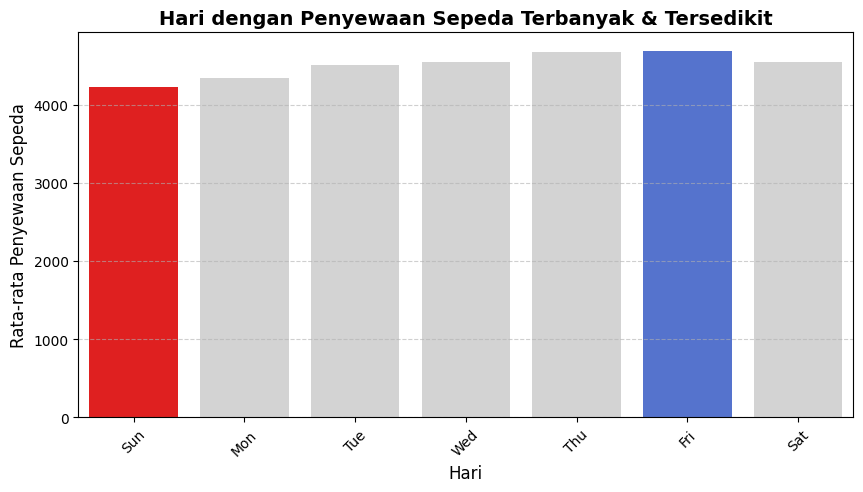

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_rentals_by_weekday = day_df.groupby('one_of_week', observed=True)['total_rentals'].mean().reset_index()

order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

max_day = avg_rentals_by_weekday.loc[avg_rentals_by_weekday['total_rentals'].idxmax(), 'one_of_week']
min_day = avg_rentals_by_weekday.loc[avg_rentals_by_weekday['total_rentals'].idxmin(), 'one_of_week']

colors = {'Sun': 'lightgray', 'Mon': 'lightgray', 'Tue': 'lightgray', 'Wed': 'lightgray',
          'Thu': 'lightgray', 'Fri': 'lightgray', 'Sat': 'lightgray'}
colors[max_day] = 'royalblue'
colors[min_day] = 'red'

plt.figure(figsize=(10, 5))

sns.barplot(
    data=avg_rentals_by_weekday,
    x="one_of_week",
    y="total_rentals",
    order=order,
    hue="one_of_week",
    palette=colors,
    legend=False
)

plt.title("Hari dengan Penyewaan Sepeda Terbanyak & Tersedikit", fontsize=14, fontweight="bold")
plt.xlabel("Hari", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

Berdasarkan hasil visualisasi, dapat ditarik beberapa kesimpulan terkait jumlah penyewaan sepeda pada berbagai hari dalam seminggu:

**Hari dengan Penyewaan Terbanyak dan Tersedikit**

- Hari dengan Penyewaan Terbanyak (Diagram Biru)

    Dari grafik yang dihasilkan, terlihat bahwa hari Jumat (Fri) memiliki rata-rata jumlah penyewaan sepeda yang paling tinggi. Hal ini menunjukkan bahwa permintaan sepeda cenderung meningkat menjelang akhir pekan, kemungkinan karena banyaknya aktivitas luar ruangan atau persiapan liburan.

- Hari dengan Penyewaan Tersedikit (Diagram Merah)
    
    Hari Minggu (Sun) memiliki rata-rata penyewaan sepeda yang paling rendah dibandingkan hari lainnya. hal ini bisa saja disebabkan oleh kebiasaan masyarakat yang lebih memilih beristirahat atau melakukan aktivitas lain di akhir pekan, sehingga kebutuhan akan penyewaan sepeda berkurang.

**Analisis Pola Penyewaan**

Tren ini mengindikasikan bahwa sepeda lebih banyak digunakan pada hari kerja dibandingkan akhir pekan.
Faktor yang mungkin menyebabkan adanya pola ini adalah:
1. Kebutuhan Transportasi

 Sepeda kemungkinan besar digunakan untuk keperluan bekerja atau aktivitas sehari-hari pada hari kerja.

2. Penurunan Aktivitas di Akhir Pekan

    Pada hari Minggu, orang mungkin lebih banyak menggunakan waktu untuk beristirahat atau menggunakan moda transportasi lain untuk perjalanan yang lebih jauh.

**Insight Bisnis**

Jika layanan penyewaan sepeda ingin meningkatkan keuntungan, maka berikut hal yang dapat dilakukan :
  - Menawarkan promo atau diskon khusus di akhir pekan untuk menarik lebih banyak pelanggan.
  - Menambah jumlah sepeda di hari kerja, terutama di sekitar kawasan perkantoran atau kampus yang berpotensi memiliki permintaan tinggi.
  - Melakukan analisis lebih lanjut terhadap pola penggunaan sepeda di berbagai lokasi untuk mengoptimalkan distribusi sepeda berdasarkan permintaan.


## **Pertanyaan 4: Di cuaca seperti apa sepeda paling sedikit disewa?**

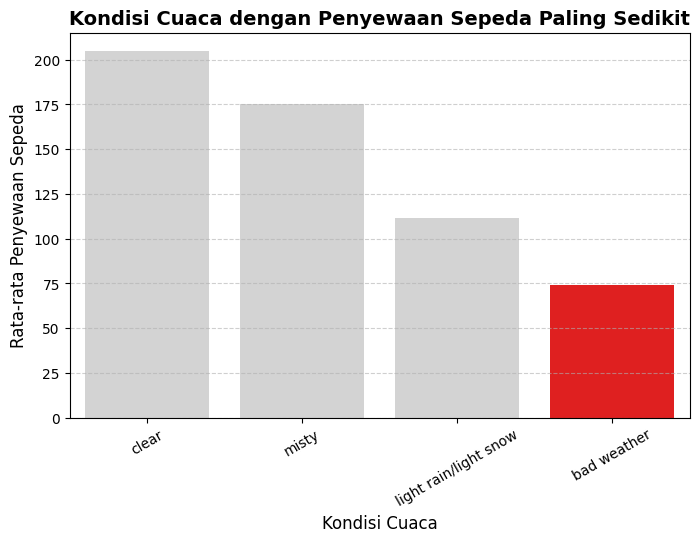

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_rentals_by_weather = hour_df.groupby('weather_condition', observed=True)['total_rentals'].mean().reset_index()

min_weather = avg_rentals_by_weather.loc[avg_rentals_by_weather['total_rentals'].idxmin(), 'weather_condition']

colors = {weather: 'lightgray' for weather in avg_rentals_by_weather['weather_condition']}
colors[min_weather] = 'red'

plt.figure(figsize=(8, 5))

sns.barplot(
    data=avg_rentals_by_weather,
    x="weather_condition",
    y="total_rentals",
    hue="weather_condition",
    palette=colors,
    legend=False
)
plt.title("Kondisi Cuaca dengan Penyewaan Sepeda Paling Sedikit", fontsize=14, fontweight="bold")
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

Berdasarkan hasil visualisasi, dapat ditarik beberapa kesimpulan terkait jumlah penyewaan sepeda dalam berbagai kondisi cuaca.

**Kondisi Cuaca dengan Penyewaan Sepeda Terbanyak dan Tersedikit**
- Kondisi Cuaca dengan Penyewaan Terbanyak

  Dari grafik yang dihasilkan, terlihat bahwa kondisi "clear" (cerah) memiliki rata-rata penyewaan sepeda tertinggi dibandingkan kondisi cuaca lainnya. Hal ini menunjukkan bahwa pengguna lebih cenderung menyewa sepeda ketika cuaca mendukung, tanpa adanya hambatan seperti hujan atau angin kencang.

- Kondisi Cuaca dengan Penyewaan Tersedikit (Diagram Merah)

 Pada kondisi "bad weather" (cuaca buruk), jumlah penyewaan sepeda mengalami penurunan yang signifikan. Hal ini dapat disebabkan oleh ketidaknyamanan dan risiko yang lebih tinggi saat berkendara dalam hujan deras atau angin kencang.

**Analisis Pola Penyewaan**

Tren ini mengindikasikan bahwa kondisi cuaca memainkan peran besar dalam keputusan pelanggan untuk menyewa sepeda. Faktor yang mungkin berkontribusi terhadap pola ini meliputi:

- Saat cuaca cerah, bersepeda menjadi lebih nyaman dan aman dibandingkan saat hujan atau angin kencang. Oleh karena itu, pengguna lebih cenderung menyewa sepeda dalam kondisi optimal.

- Pada hari dengan cuaca buruk, orang mungkin lebih memilih moda transportasi lain seperti kendaraan pribadi atau transportasi umum, sehingga permintaan penyewaan sepeda menurun.

**Insight Bisnis**

Jika layanan penyewaan sepeda ingin mengoptimalkan keuntungan dan menyesuaikan strategi dengan pola ini, berikut beberapa langkah yang dapat diterapkan:

- Strategi Promo Berbasis Cuaca

  Menawarkan diskon atau promo spesial saat cuaca buruk untuk tetap menarik pelanggan

- Optimalisasi Stok Sepeda
  
  Menyediakan lebih banyak unit sepeda di lokasi strategis saat prakiraan cuaca cerah dan mengatur ulang distribusi sepeda agar tetap tersedia di area dengan permintaan tinggi.

- Menyediakan aksesori pelindung cuaca, seperti jas hujan.

## **Pertanyaan 5: Mana yang lebih banyak antara penyewa registered atau casual?**


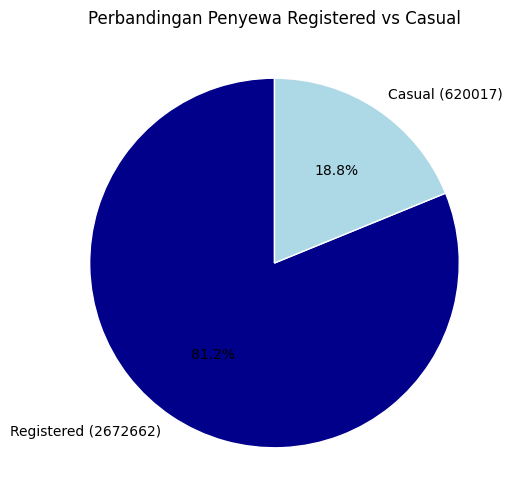

In [39]:
import matplotlib.pyplot as plt

total_registered = hour_df['registered_rentals'].sum()
total_casual = hour_df['casual_rentals'].sum()

labels = [f'Registered ({total_registered})', f'Casual ({total_casual})']
sizes = [total_registered, total_casual]
colors = ['darkblue', 'lightblue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title('Perbandingan Penyewa Registered vs Casual')

plt.show()

Berdasarkan visualisasi pie chart, terlihat bahwa mayoritas penyewa sepeda berasal dari kategori registered, dengan jumlah 2.672.662 penyewa (81,2%), sedangkan penyewa dari kategori casual hanya sebanyak 620.017 penyewa (18,8%).

**Analisis Perbedaan Antara Registered dan Casual**

- Registered Rentals (ditandai dengan warna biru tua) mendominasi penggunaan sepeda, yang berarti sebagian besar pengguna adalah pelanggan tetap atau berlangganan.
- Casual Rentals (ditandai dengan warna biru muda) memiliki jumlah yang jauh lebih sedikit, menunjukkan bahwa penggunaan sepeda oleh pelanggan non-berlangganan relatif rendah.

**Insight Bisnis**

- Fokus pada Retensi Pelanggan Registered

 Karena pelanggan registered mendominasi, penting untuk meningkatkan layanan bagi mereka, seperti program loyalitas atau peningkatan kenyamanan berlangganan.
- Menarik Lebih Banyak Pelanggan Casual

  Strategi promosi seperti diskon untuk penyewaan pertama atau paket sewa fleksibel dapat menarik lebih banyak pengguna casual untuk menjadi pelanggan tetap.

- Menganalisis Pola Penggunaan

 Memahami kapan dan di mana penyewa casual lebih aktif dapat membantu dalam penyusunan strategi pemasaran dan penyediaan sepeda di lokasi strategis.


## **Pertanyaan 6 : Kapan orang lebih sering menyewa sepeda, apakah pada hari libur atau hari kerja?**

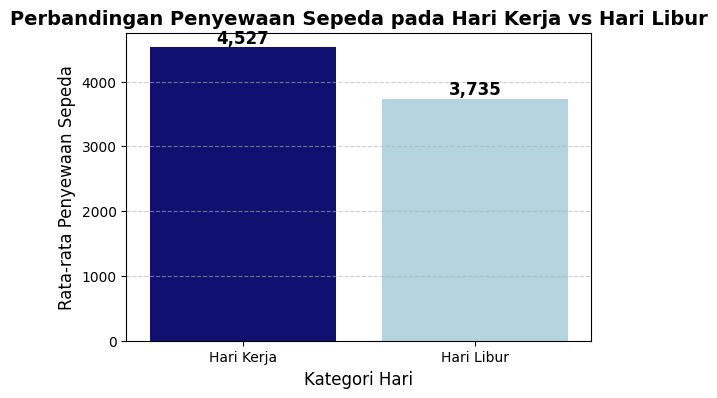

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_rentals_by_day_type = day_df.groupby('holiday', observed=True)['total_rentals'].mean().reset_index()

avg_rentals_by_day_type['holiday'] = avg_rentals_by_day_type['holiday'].replace({
    0: "Hari Kerja",
    1: "Hari Libur"
})

max_category = avg_rentals_by_day_type.loc[avg_rentals_by_day_type['total_rentals'].idxmax(), 'holiday']
color_palette = {category: 'navy' if category == max_category else 'lightblue' for category in avg_rentals_by_day_type['holiday']}

plt.figure(figsize=(6, 4))

ax = sns.barplot(
    data=avg_rentals_by_day_type,
    x="holiday",
    y="total_rentals",
    hue="holiday",
    palette=color_palette,
    legend=False
)

for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.title("Perbandingan Penyewaan Sepeda pada Hari Kerja vs Hari Libur", fontsize=14, fontweight="bold")
plt.xlabel("Kategori Hari", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

Berdasarkan hasil visualisasi, dapat ditarik beberapa kesimpulan terkait pola penyewaan sepeda pada hari kerja dan hari libur:

**Perbandingan Penyewaan Sepeda**

Pada hari kerja memiliki jumlah rata rata penyewaan yang lebih ramai dibandingkan pada saat hari libur.

**Analisis Pola Penyewaan**

Beberapa faktor yang mungkin memengaruhi pola ini:

1. Kebutuhan Transportasi

    Pada hari kerja, banyak orang menggunakan sepeda sebagai alat transportasi untuk berangkat ke kantor, sekolah, atau keperluan sehari-hari.
Ini menyebabkan permintaan sepeda lebih tinggi dibandingkan akhir pekan.
2. Perubahan Aktivitas pada Hari Libur

    Pada hari libur, orang cenderung memiliki lebih banyak pilihan aktivitas rekreasi selain bersepeda, seperti bepergian jauh dengan kendaraan pribadi atau umum.

**Insight Bisnis**

Berdasarkan pola ini, beberapa strategi bisnis yang dapat diterapkan untuk meningkatkan penyewaan sepeda:

- Meningkatkan layanan saat hari kerja

    Menyediakan lebih banyak sepeda di area perkantoran dan kampus dan mempermudah akses penyewaan saat jam sibuk pagi dan sore hari.

- Menarik lebih banyak pelanggan di hari libur

    Menawarkan diskon atau promo khusus di akhir pekan untuk menarik lebih banyak pelanggan dan
mengadakan event bersepeda atau kerja sama dengan tempat wisata untuk meningkatkan penyewaan.


## **Pertanyaan 7: Bagaimana performa penyewaan sepeda dalam beberapa tahun terakhir?**


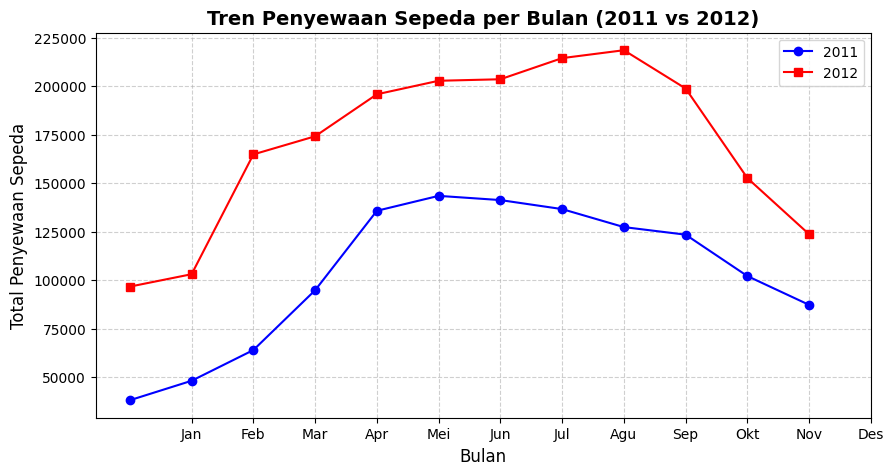

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

monthly_rentals = day_df.groupby(['year', 'month'], observed=True)['total_rentals'].sum().reset_index()

pivot_table = monthly_rentals.pivot(index='month', columns='year', values='total_rentals')

plt.figure(figsize=(10, 5))
plt.plot(pivot_table.index, pivot_table[2011], marker='o', linestyle='-', label='2011', color='blue')
plt.plot(pivot_table.index, pivot_table[2012], marker='s', linestyle='-', label='2012', color='red')

plt.title('Tren Penyewaan Sepeda per Bulan (2011 vs 2012)', fontsize=14, fontweight='bold')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penyewaan Sepeda', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

Berdasarkan hasil visualisasi, dapat ditarik beberapa kesimpulan mengenai tren penyewaan sepeda dalam dua tahun terakhir (2011 dan 2012).

**Perbandingan Penyewaan Sepeda**

Pada tahun 2011, jumlah penyewaan sepeda cenderung meningkat dari Januari hingga mencapai puncaknya pada bulan Mei-Juli, lalu mengalami sedikit penurunan di akhir tahun. Sedangkan pada tahun 2012, jumlah penyewaan jauh lebih tinggi dibandingkan tahun 2011. Kenaikan mulai terlihat sejak Februari, terus meningkat hingga puncaknya pada bulan Agustus, sebelum akhirnya menurun menjelang akhir tahun.

**Analisis Pola Penyewaan**

Beberapa faktor yang mungkin memengaruhi perbedaan tren antara 2011 dan 2012:

- Pertumbuhan Pengguna Sepeda

    Tahun 2012 menunjukkan peningkatan signifikan dalam jumlah penyewaan dibandingkan 2011. Ini mungkin disebabkan oleh meningkatnya popularitas penggunaan sepeda sebagai alat transportasi atau rekreasi.


**Insight Bisnis**

Berdasarkan pola yang terlihat, beberapa strategi dapat diterapkan untuk meningkatkan jumlah penyewaan sepeda:

- Meningkatkan layanan di bulan - bulan yang ramai

  Menyediakan lebih banyak sepeda selama bulan dengan penyewaan tinggi (Mei-Agustus).
  Menawarkan layanan pemeliharaan dan perbaikan yang lebih cepat untuk menghindari kekurangan sepeda di musim sibuk.
- Meningkatkan promosi di musim sepi
  Memberikan diskon atau promo di bulan-bulan dengan tren penyewaan rendah untuk menjaga kestabilan penyewaan.

- Mengadakan event atau kampanye bersepeda di bulan-bulan dengan permintaan rendah untuk meningkatkan minat pengguna.

## **Analisis Lanjutan**

Analisis lanjutan menggunakan manual grouping dan binning dipilih karena metode ini lebih sederhana, cepat, dan mudah diinterpretasikan untuk memahami pola penyewaan sepeda berdasarkan faktor eksternal seperti musim, hari kerja/libur, dan kondisi cuaca. Metode lain seperti clustering atau analisis RFM tidak digunakan karena dataset ini lebih fokus pada tren penyewaan harian daripada perilaku pelanggan individu atau segmentasi berbasis algoritma. Dengan pendekatan ini, insight yang dihasilkan bisa langsung digunakan untuk pengambilan keputusan operasional.

**1. Manual Grouping: Mengelompokkan rata-rata penyewaan sepeda berdasarkan musim, hari kerja/libur, dan kondisi cuaca.**

In [42]:
import pandas as pd

grouped_season = day_df.groupby('season', observed=True)['total_rentals'].mean()
grouped_working_day = day_df.groupby('working_day', observed=True)['total_rentals'].mean()
grouped_weather = day_df.groupby('weather_condition', observed=True)['total_rentals'].mean()

print("Rata-rata penyewaan berdasarkan Musim:\n", grouped_season)
print("\nRata-rata penyewaan berdasarkan Hari Kerja/Libur:\n", grouped_working_day)
print("\nRata-rata penyewaan berdasarkan Kondisi Cuaca:\n", grouped_weather)

Rata-rata penyewaan berdasarkan Musim:
 season
Spring    2604.132597
Summer    4992.331522
Fall      5644.303191
Winter    4728.162921
Name: total_rentals, dtype: float64

Rata-rata penyewaan berdasarkan Hari Kerja/Libur:
 working_day
0    4330.168831
1    4584.820000
Name: total_rentals, dtype: float64

Rata-rata penyewaan berdasarkan Kondisi Cuaca:
 weather_condition
clear                    4876.786177
misty                    4035.862348
light rain/light snow    1803.285714
Name: total_rentals, dtype: float64


2. **Binning : Mengelompokkan jumlah penyewaan sepeda ke dalam kategori berdasarkan kuartil.**

In [43]:
quantiles = day_df['total_rentals'].quantile([0.33, 0.66]).values

def categorize_rentals(value):
    if value <= quantiles[0]:
        return "Rendah"
    elif value <= quantiles[1]:
        return "Sedang"
    else:
        return "Tinggi"

day_df['rental_category'] = day_df['total_rentals'].apply(categorize_rentals)

print(day_df['rental_category'].value_counts())

rental_category
Tinggi    249
Rendah    241
Sedang    241
Name: count, dtype: int64


## **Conclusion**

- **Conclusion Pertanyaan 1: Kapan waktu (jam) dengan jumlah penyewaan sepeda terbanyak?**

    Puncak penyewaan sepeda terjadi pada pukul 17:00, yang kemungkinan besar bertepatan dengan jam pulang kerja, diikuti pada pukul 08:00 dimana terdapat kemungkinan aktivitas saat orang berangkat kerja atau sekolah.


- **Conclusion Pertanyaan 2:Pada bulan apa penyewaan sepeda banyak dilakukan?**

    Bulan dengan penyewaan sepeda terbanyak adalah Juni. Ini mungkin dipengaruhi oleh faktor cuaca yang lebih kondusif atau musim liburan.

- **Conclusion Pertanyaan 3: Pada hari apa sepeda paling sedikit dan banyak yang disewa?**

    Hari dengan penyewaan terbanyak adalah Jumat, sedangkan hari dengan penyewaan paling sedikit adalah Minggu. Hal ini bisa menunjukkan bahwa banyak orang menggunakan sepeda untuk keperluan kerja atau aktivitas harian.

- **Conclusion Pertanyaan 4: Di cuaca seperti apa sepeda paling sedikit disewa?**
    
    Cuaca buruk (bad weather) menyebabkan penyewaan sepeda paling sedikit. Hujan lebat atau kondisi ekstrem kemungkinan besar mengurangi minat penyewaan.

- **Conclusion Pertanyaan 5: Mana yang lebih banyak antara penyewa registered atau casual?**

    Lebih banyak penyewa registered dibandingkan casual, dengan proporsi sekitar 81.2% vs 18.8%. Ini menunjukkan bahwa mayoritas pengguna adalah pelanggan tetap yang berlangganan layanan.

- **Conclusion Pertanyaan 6 : Kapan orang lebih sering menyewa sepeda, apakah pada hari libur atau hari kerja**

    Penyewaan lebih banyak terjadi pada hari kerja dibandingkan hari libur. Hal ini bisa menunjukkan bahwa sepeda lebih banyak digunakan untuk transportasi harian dibandingkan rekreasi.

- **Conclusion Pertanyaan 7: Bagaimana performa penyewaan sepeda dalam beberapa tahun terakhir?**

    Tren penyewaan mengalami peningkatan signifikan dari 2011 ke 2012, dengan puncaknya terjadi di pertengahan tahun. Hal ini bisa disebabkan oleh meningkatnya kesadaran terhadap transportasi ramah lingkungan atau faktor eksternal lainnya.



In [44]:
day_df.to_csv("day_data.csv", index=False)

In [45]:
hour_df.to_csv("hour_data.csv", index=False)